In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.array([[1,2],[2,3],[9,4]])

In [3]:
data

array([[1, 2],
       [2, 3],
       [9, 4]])

In [4]:
np.sum(data**2,axis=1)

array([ 5, 13, 97])

In [5]:
data-(data-[3,2])

array([[3, 2],
       [3, 2],
       [3, 2]])

In [6]:
np.linalg.norm(data-(data-[3,2]),axis=1).sum()

10.816653826391967

In [9]:
def Kmeans(data, K, epsilon=0.1, max_iter=1000):
    p=len(data[0])
    centroids = np.random.uniform(0,100,(K,p))
    for t in range(max_iter):
        l = [[] for i in range(K)]
        for i in range(len(data)):
            l[np.argmin(np.linalg.norm(centroids-data[i],axis=1))].append(i)

        c_new = np.zeros(shape=(K,p))
        
        for i in range(K):
            c_new[i] = data[l[i]].mean(axis=0)
        if np.linalg.norm(c_new-centroids,axis=1).sum()<epsilon:
            break
        centroids = c_new.copy()
        
    return centroids

In [10]:
data = np.random.uniform(0,100,(15,2))
K = 2
c = Kmeans(data,K)

In [11]:
c

array([[48.64752048, 77.54010791],
       [53.39946197, 15.2617412 ]])

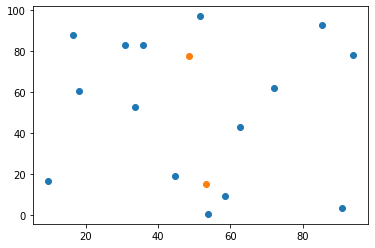

In [12]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(c[:,0],c[:,1])

In [20]:
a = [3,4]

In [23]:
a.extend([])

In [32]:
a

[3, 4, 5, 4]

In [33]:
a.pop()

4

In [34]:
a

[3, 4, 5]

# Generate Gaussian mixture data

In [254]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(7)
centroids = np.random.uniform(-1,1,size=(6,2))
centroids[:,0]*=10
centroids[:,1]*=15

size = [100, 400, 180, 50, 250, 20]
std = [3,4,1,2,2.3,1.8]
points = {}
for i in range(6):
    nor = np.random.normal(size=(size[i],2))
    points[i] = (nor*std[i] + centroids[i])

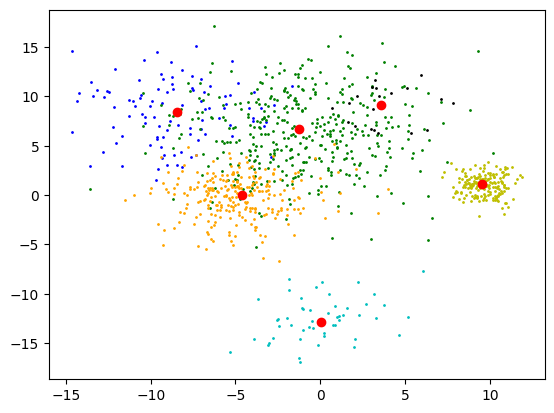

In [255]:

plt.scatter(points[0][:,0], points[0][:,1], s=1, color='b')
plt.scatter(points[1][:,0], points[1][:,1], s=1, color='g')
plt.scatter(points[2][:,0], points[2][:,1], s=1, color='y')
plt.scatter(points[3][:,0], points[3][:,1], s=1, color='c')
plt.scatter(points[4][:,0], points[4][:,1], s=1, color='orange')
plt.scatter(points[5][:,0], points[5][:,1], s=1, color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='r')

In [256]:
df_data = pd.DataFrame([(x,y,k) for k, v in points.items() for x,y in v])
df_data.columns = ['x', 'y', 'group']
df_data['centroids'] = df_data.group.map(lambda x: centroids[x])
df_data.sample(random_state=19,frac=1).reset_index(drop=True)

,x,y,group,centroids
0,-6.304642,0.518132,4,"[-4.631220397962577, -0.0035249752332011663]"
1,-4.043633,-1.270127,4,"[-4.631220397962577, -0.0035249752332011663]"
2,-12.778725,9.902436,0,"[-8.473834212520856, 8.397563767203438]"
3,-6.303512,1.358193,4,"[-4.631220397962577, -0.0035249752332011663]"
4,-2.584349,5.140504,1,"[-1.23181537118213, 6.703955334928237]"
...,...,...,...,...
995,-5.176827,0.814965,4,"[-4.631220397962577, -0.0035249752332011663]"
996,-2.135692,12.705231,1,"[-1.23181537118213, 6.703955334928237]"
997,-1.903346,-2.905362,4,"[-4.631220397962577, -0.0035249752332011663]"
998,10.438258,-0.455614,2,"[9.559790239932052, 1.1548761123130102]"


In [257]:
df_data

,x,y,group,centroids
0,-10.350121,7.882919,0,"[-8.473834212520856, 8.397563767203438]"
1,-6.957936,7.613495,0,"[-8.473834212520856, 8.397563767203438]"
2,-9.202081,4.037840,0,"[-8.473834212520856, 8.397563767203438]"
3,-6.810093,8.769206,0,"[-8.473834212520856, 8.397563767203438]"
4,-7.650454,3.817990,0,"[-8.473834212520856, 8.397563767203438]"
...,...,...,...,...
995,3.448592,10.028269,5,"[3.5845999224188096, 9.112171083131264]"
996,2.150113,10.050252,5,"[3.5845999224188096, 9.112171083131264]"
997,3.034253,10.906225,5,"[3.5845999224188096, 9.112171083131264]"
998,5.928050,12.131037,5,"[3.5845999224188096, 9.112171083131264]"


In [258]:
data = np.array(df_data[['x', 'y']])

In [259]:
data

array([[-10.35012113,   7.88291898],
       [ -6.95793609,   7.61349452],
       [ -9.20208145,   4.03783953],
       ...,
       [  3.03425281,  10.90622495],
       [  5.92805023,  12.13103683],
       [  3.19666934,   6.57629883]])

In [260]:
n = len(data)
dist = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dist[i,j] = ((data[i]-data[j])**2).sum()


In [282]:
from typing import List, Union, Tuple

In [272]:
type(data)

numpy.ndarray

In [283]:
def Kmeans(data: Union[List[float], np.ndarray], k: int) -> Tuple[np.ndarray, List[float]]:
    np.random.seed(1)
    n = len(data)
    idx = np.random.choice(range(n), size=k, replace=False)
    centroids = data[idx,:]
    losses = []
    for _ in range(100):
        distance = []
        for c in centroids:
            distance.append(((data-c)**2).sum(axis=1))
        assigned_centroids = np.array(distance).argmin(axis=0)
        loss = 0
        for c in range(k):
            idx = np.argwhere(assigned_centroids==c).reshape(-1)
            for i in idx:
                for j in idx:
                    loss += dist[i,j]
        losses.append(loss/2)
        new_centroids = []
        for i in range(k):
            new_centroids.append(data[assigned_centroids==i].mean(axis=0))
        centroids = np.array(new_centroids)
        if len(losses)>1 and abs(losses[-1]-losses[-2]) < 1:
            break
    
    return centroids, losses

In [284]:
centroids_pred, losses = Kmeans(data, 3)

In [285]:
losses

[10465563.948556818,
 9792264.318631835,
 9534777.324858857,
 9410667.226608101,
 9324332.083274368,
 9322004.378349379,
 9322004.378349379]

In [264]:
centroids_pred = []
loss = []
for k in range(2,10):
    c, l = Kmeans(data, k)
    centroids_pred.append(c)
    loss.append(l[-1])

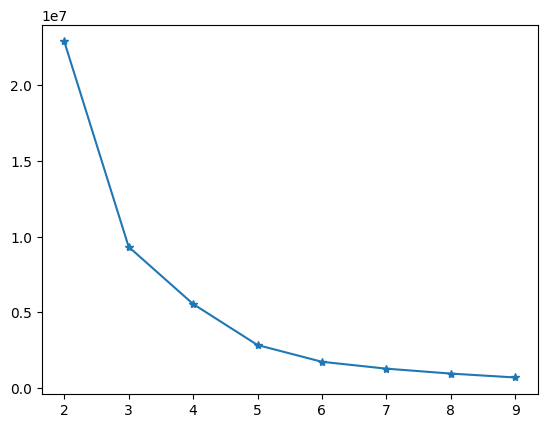

In [265]:
plt.plot(np.linspace(2,9,8), loss, marker='*')

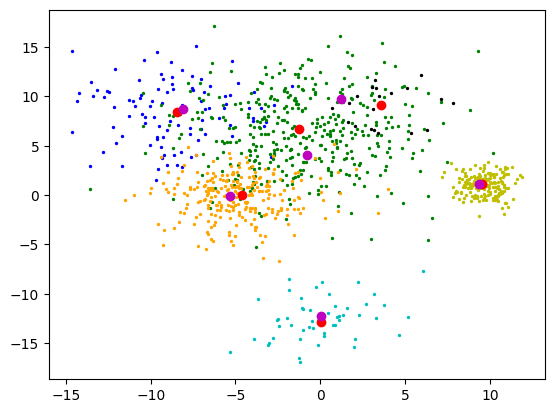

In [268]:
plt.scatter(points[0][:,0], points[0][:,1], s=2, color='b')
plt.scatter(points[1][:,0], points[1][:,1], s=2, color='g')
plt.scatter(points[2][:,0], points[2][:,1], s=2, color='y')
plt.scatter(points[3][:,0], points[3][:,1], s=2, color='c')
plt.scatter(points[4][:,0], points[4][:,1], s=2, color='orange')
plt.scatter(points[5][:,0], points[5][:,1], s=2, color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='r')
plt.scatter(centroids_pred[4][:,0], centroids_pred[4][:,1], color='m')